In [1]:
import json
import pandas as pd
import numpy as np
from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
drive.mount('/content/drive')
PATH = 'drive/MyDrive/CSCI567-PII-Project/'

Mounted at /content/drive


In [22]:
train = json.load(open(PATH + "kaggle/input/pii-detection-removal-from-educational-data/train.json"))
test = json.load(open(PATH + "kaggle/input/pii-detection-removal-from-educational-data/test.json"))

In [23]:
train_data = pd.json_normalize(train)
train_data.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [24]:
for i in train_data.iloc[100]:
  print(i)

2955
Using Storytelling Tool for Student Counseling

 Challenge:

I am a faculty of a university and I have to deal with many types of psycho-social problems of the  students. Though my job is mostly academic, still being a mentor and adviser, I need to address  these issues. Students often do not open up at their first interaction. Their symptoms of disturbance  are usually expressed through their attitude in the classroom and other interactions. Some students  are irregular and remain unmindful in the class, others are ill mannered or rough in conduct. Some  students seems stressful and tired and even suffer from psychosomatic physical sickness. The  university has appointed a full time psychologist, with a separate office and facilities, who provides  Psycho-Social Counseling services for the students. But the students have some stigma regarding  communicating the psychologist as they think it will isolate them from others and they will be  considered mentally ill. Hence they somet

In [25]:
test_data = pd.json_normalize(test)
test_data.head()

,document,full_text,tokens,trailing_whitespace
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal..."


In [26]:
train_data1 = train_data[['document', 'tokens', 'labels']]
train_data_exploded = pd.DataFrame()
train_data_exploded = train_data1.apply(lambda col: col.explode(), axis=0).reset_index(drop=True)
train_data_exploded.head()

,document,tokens,labels
0,7,Design,O
1,7,Thinking,O
2,7,for,O
3,7,innovation,O
4,7,reflexion,O


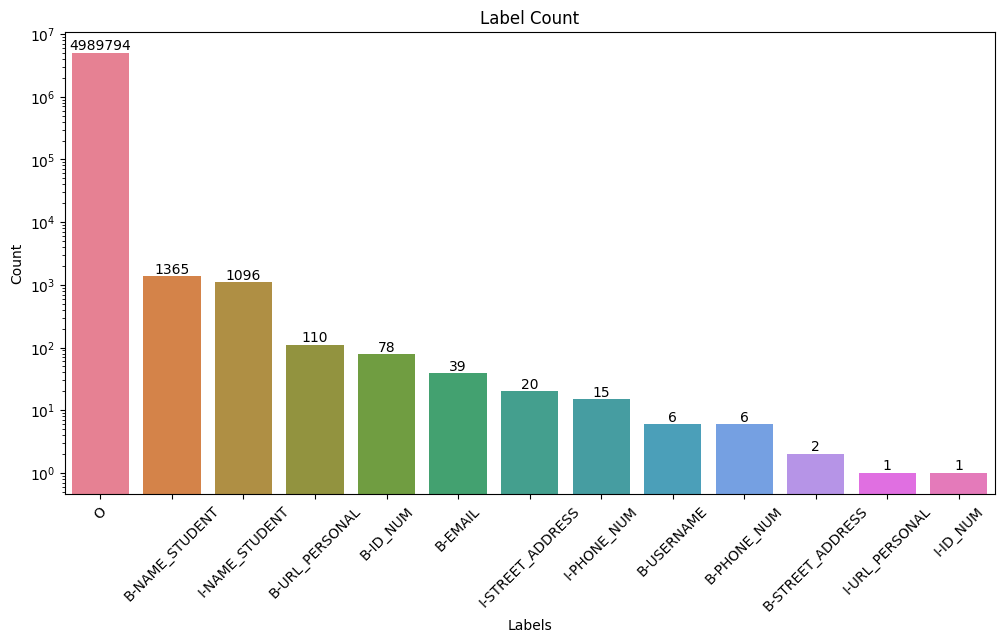

In [27]:
label_counts = train_data_exploded['labels'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='husl', hue=label_counts.index, legend=False)

plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(rotation=45)

for i in range(len(label_counts)):
    plt.text(i, label_counts.values[i], label_counts.values[i], ha = 'center', va = 'bottom')

plt.show()

In [28]:
label_counts

labels
O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64

<ipython-input-29-d05a9d52db36>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=counts, palette='husl')


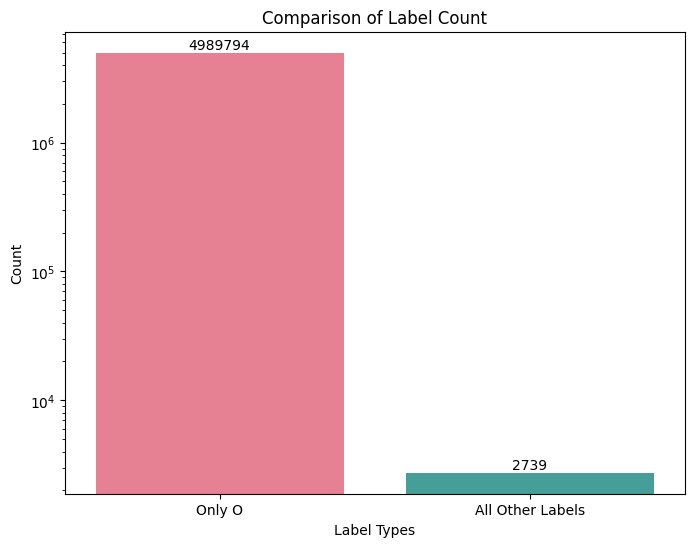

In [29]:
only_o_count = train_data_exploded[train_data_exploded['labels'] == 'O'].shape[0]

other_labels_count = train_data_exploded[train_data_exploded['labels'] != 'O'].shape[0]

counts = pd.DataFrame({'Type': ['Only O', 'All Other Labels'], 'Count': [only_o_count, other_labels_count]})

plt.figure(figsize=(8, 6))

sns.barplot(x='Type', y='Count', data=counts, palette='husl')

plt.title('Comparison of Label Count')
plt.xlabel('Label Types')
plt.ylabel('Count')
plt.yscale('log')

for i in range(len(counts)):
    plt.text(i, counts['Count'][i], f'{counts["Count"][i]}', ha='center', va='bottom')

plt.show()

In [11]:
ratio = only_o_count/ other_labels_count
ratio

1821.7575757575758

In [30]:
gen_data = pd.read_csv('drive/MyDrive/gen_data.csv')
gen_data = gen_data.reset_index().rename(columns={'index': 'document'})
gen_data

,document,tokenized response,labels
0,0,"['John', 'Shepherd', 'was', 'a', 'man', 'of', ...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."
1,1,"['Holly', 'Booth', 'was', 'a', 'young', 'woman...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."
2,2,"['Anthony', 'Snyder', 'was', 'a', 'man', 'from...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."
3,3,"['553633', 'Michael', 'Hammond', 'is', 'a', 'm...","['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O',..."
4,4,"['687955', 'Damien', 'Murray', 'is', 'a', 'suc...","['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O',..."
...,...,...,...
95,95,"['Dara', 'Ledwith', 'was', 'a', 'successful', ...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."
96,96,"['Grant', 'McCloskey', 'is', 'a', '37', '-', '...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."
97,97,"['Katherine', 'Nelson', 'was', 'a', '65', '-',...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."
98,98,"['Allen', 'Scott', 'was', 'a', '26', '-', 'yea...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."


In [31]:
gen_data_label_counts={
    'O':                   21922,
'B-NAME_STUDENT':         100,
'I-NAME_STUDENT':         100,
'B-URL_PERSONAL':          100,
'B-ID_NUM':                 100,
'B-EMAIL':                  100,
'I-STREET_ADDRESS':         300,
'B-USERNAME':                100,
'B-PHONE_NUM':               100,
'B-STREET_ADDRESS':          100,
}

<ipython-input-35-e22f99f9c056>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=gen_data_counts, palette='husl')


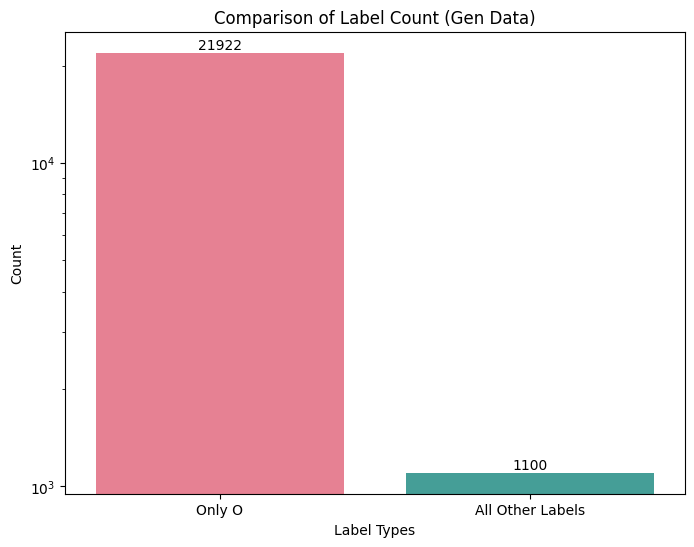

In [35]:
gen_data_only_o_count = gen_data_label_counts['O']
gen_data_other_labels_count = sum(count for label, count in gen_data_label_counts.items() if label != 'O')

gen_data_counts = pd.DataFrame({'Type': ['Only O', 'All Other Labels'], 'Count': [gen_data_only_o_count, gen_data_other_labels_count]})

plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Count', data=gen_data_counts, palette='husl')

plt.title('Comparison of Label Count (Gen Data)')
plt.xlabel('Label Types')
plt.ylabel('Count')
plt.yscale('log')

for i in range(len(counts)):
    plt.text(i, gen_data_counts['Count'][i], f'{gen_data_counts["Count"][i]}', ha='center', va='bottom')


plt.show()

In [ ]:
gen_data_ratio = gen_data_only_o_count / gen_data_other_labels_count
gen_data_ratio

19.92909090909091

<ipython-input-48-e02bd89287f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=counts,width = 0.4, palette='husl')
<ipython-input-48-e02bd89287f3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=gen_data_counts,width = 0.4, palette='husl')


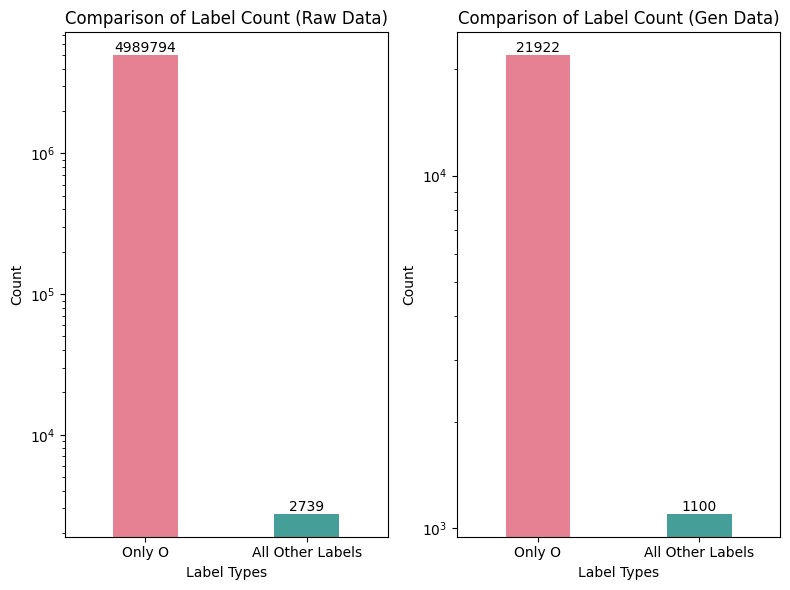

In [48]:
plt.figure(figsize=(8, 6))

# Plot the first bar graph
plt.subplot(1, 2, 1)
sns.barplot(x='Type', y='Count', data=counts,width = 0.4, palette='husl')
plt.title('Comparison of Label Count (Raw Data)')
plt.xlabel('Label Types')
plt.ylabel('Count')
plt.yscale('log')

for i in range(len(counts)):
    plt.text(i, counts['Count'][i], f'{counts["Count"][i]}', ha='center', va='bottom')

# Plot the second bar graph
plt.subplot(1, 2, 2)
sns.barplot(x='Type', y='Count', data=gen_data_counts,width = 0.4, palette='husl')
plt.title('Comparison of Label Count (Gen Data)')
plt.xlabel('Label Types')
plt.ylabel('Count')
plt.yscale('log')

for i in range(len(gen_data_counts)):
    plt.text(i, gen_data_counts['Count'][i], f'{gen_data_counts["Count"][i]}', ha='center', va='bottom')

# # Set the same y-axis limits for both subplots
# plt.ylim(max(min(counts['Count']), min(gen_data_counts['Count'])),
#          max(max(counts['Count']), max(gen_data_counts['Count'])))

plt.tight_layout()
plt.show()